# Exploratory Data Analysis

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer('\s+', gaps=True)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.decomposition import NMF

In [2]:
df = pd.read_csv('../collection and cleaning/cleaned files/combined.csv')
df.drop(columns='Unnamed: 0', inplace=True)

In [3]:
df.head()

,text,is_craft
0,badly damaged exterior wall studs is this out ...,0
1,need help removing a screw from the back of a ...,0
2,add second post parallel to existing post i ha...,0
3,rtyuiooopfghjkl,0
4,diy - recycled vinyl record clock,0


[attempt all of the following to the best of you're abilities](https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a)

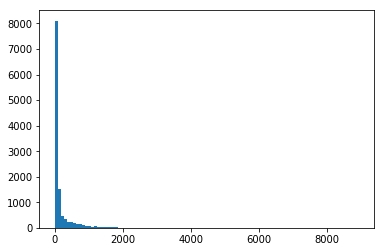

In [4]:
lengths = []
for i in df.text:
    lengths.append(len(i))
plt.hist(lengths, bins = 100);

In [5]:
print(len(set(df.text)))
print(df.shape[0])

11521
11987


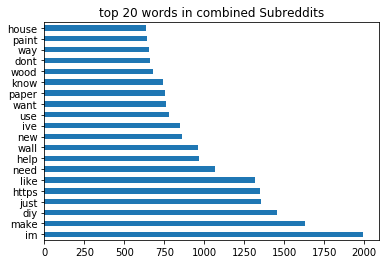

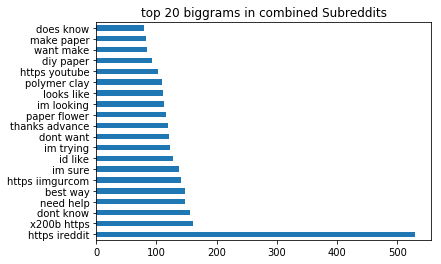

In [6]:
cv = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=1, max_df=0.7, max_features=9600)
df_matrix = pd.DataFrame(cv.fit_transform(df['text']).todense(), columns=cv.get_feature_names())
df_matrix.sum(
             ).sort_values(ascending=False,
                           ).head(20,
                                 ).plot.barh(title='top 20 words in combined Subreddits');
plt.show()

cv = CountVectorizer(stop_words='english', ngram_range=(2,2), min_df=1, max_df=0.7, max_features=9600)
df_matrix_bigram = pd.DataFrame(cv.fit_transform(df['text']).todense(), columns=cv.get_feature_names())
df_matrix_bigram.sum(
             ).sort_values(ascending=False,
                           ).head(20,
                                 ).plot.barh(title='top 20 biggrams in combined Subreddits');

In [7]:
cv = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=1, max_df=0.7, max_features=9600)
crafts_matrix = pd.DataFrame(cv.fit_transform(df[df['is_craft'] == 1]['text']).todense(), columns=cv.get_feature_names())
crafts_matrix.sum(
             ).sort_values(ascending=False,
                           ).head(20,
                                 ).plot.barh(title='top 20 words in Crafts Subreddits');
plt.show()

cv = CountVectorizer(stop_words='english', ngram_range=(2,2), min_df=1, max_df=0.7, max_features=9600)
crafts_matrix_bigram = pd.DataFrame(cv.fit_transform(df[df['is_craft'] == 1]['text']).todense(), columns=cv.get_feature_names())
crafts_matrix_bigram.sum(
             ).sort_values(ascending=False,
                           ).head(20,
                                 ).plot.barh(title='top 20 biggrams in Crafts Subreddits');

KeyError: 'Is_craft'

In [ ]:
cv = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=1, max_df=0.7, max_features=9600)
diy_matrix = pd.DataFrame(cv.fit_transform(df[df['Is_craft'] == 0]['text']).todense(), columns=cv.get_feature_names())
diy_matrix.sum(
             ).sort_values(ascending=False,
                           ).head(20,
                                 ).plot.barh(title='top 20 words in DIY Subreddits');
plt.show()

cv = CountVectorizer(stop_words='english', ngram_range=(2,2), min_df=1, max_df=0.7, max_features=9600)
diy_matrix_bigram = pd.DataFrame(cv.fit_transform(df[df['Is_craft'] == 0]['text']).todense(), columns=cv.get_feature_names())
diy_matrix_bigram.sum(
             ).sort_values(ascending=False,
                           ).head(20,
                                 ).plot.barh(title='top 20 biggrams in DIY Subreddits');

I tried to clean the https and wesbsite tokens, but I was receiving worse scores after trying to model the data. 


In [ ]:
tfidf_vec= TfidfVectorizer()

In [ ]:
no_topics=20

nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd')
# nmf.fit(tfidf_vec.fit_transform(df['text']).todense())


In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [ ]:

tfidf_vec.fit(df['text'])
tfidf_feature_names = tfidf_vec.get_feature_names()

nmf.fit(tfidf_vec.transform(df.text).todense())


no_top_words = 10
display_topics(nmf, tfidf_feature_names, no_top_words)
# display_topics(lda, tf_feature_names, no_top_words)

In [28]:
cv_feature_names = cv.get_feature_names()

In [29]:
crafts = df[df['is_craft']==1]
diy = df[df['is_craft']==0]

In [30]:
no_topics=15
no_top_words = 10
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd')

nmf.fit(tfidf_vec.fit_transform(crafts['text']).todense())
tfidf_vec.fit_transform(crafts['text'])
tfidf_feature_names = tfidf_vec.get_feature_names()

display_topics(nmf, tfidf_feature_names, no_top_words)

Topic 0:
the to it and for im but you is that
Topic 1:
paper flower flowers diy crafts backdrop heart tutorial template beautiful
Topic 2:
made for some from little earrings wreath necklace friend halloween
Topic 3:
flower jute vase rope bottle plastic craft decoration with and
Topic 4:
diy ideas home decor rakhi crafts easy at for room
Topic 5:
how make to origami beautiful mini an house learn kids
Topic 6:
my first attempt new at for wreath time ever project
Topic 7:
alena tihonova from topiary idea magnet diy flowers shells fall
Topic 8:
in link tutorial comment instruction easy making kids arabic story
Topic 9:
wall hanging decoration beautiful unique ideas idea decor handicraft clock
Topic 10:
with resin wood and art epoxy bow pendant tie amazing
Topic 11:
of out waste best craft one proud turned the old
Topic 12:
acrylic on painting canvas 2019 cm 50 pour panel tanis
Topic 13:
clay polymer by and little earrings me brooch from leather
Topic 14:
this finished is just today one pie

## Crafts topics
-------------
#### Useful

- topic 1: paper crafts with tutorials attached
- topic 2: jewlery centered with a reference to a holiday
- topic 3: flower vase made from jute rope
- topic 4: home decor crafts
- topic 5: origami tutorials for kids?
- topic 6: new to a project
- topic 7: alena tihonova is a youtuber that posts flower craft videos
- topic 9: 'wall hanging' specific decor ideas
- topic 10: wood and resin crafts
- topic 13: clay polymer jewlery

In [31]:

nmf.fit(tfidf_vec.fit_transform(diy['text']).todense())
tfidf_vec.fit_transform(diy['text'])
tfidf_feature_names = tfidf_vec.get_feature_names()

display_topics(nmf, tfidf_feature_names, no_top_words)

Topic 0:
the of in is to that and on wall are
Topic 1:
how to make remove your lamp from napkin build these
Topic 2:
diy desk easy standing halloween rakhi for photo 2019 project
Topic 3:
made for wood of out from with an myself rack
Topic 4:
this is anyone know can how does on any help
Topic 5:
fix how can this do it leaking to on dent
Topic 6:
table coffee gaming dining antiqued saw file end flat wood
Topic 7:
it and to for but with have be im that
Topic 8:
waste boxes cardboard shoe reuse best empty out of how
Topic 9:
wall decor home ideas hanging 2019 room craft decoration projects
Topic 10:
paper flower flowers easy step hangings craft heart art make
Topic 11:
door garage frame doors front sliding glass lock help opening
Topic 12:
light ring unboxing selfie ri switch cheap videos youtube fan
Topic 13:
what do you need these paint think is called kind
Topic 14:
my built first for fence in project own garage finished


## DIY topics
------------
#### useful

- Topic 3: object made from wood
- Topic 4: someone asking for help on a project
- Topic 5: fixing something (leakage and dents)
- Topic 6: novelty tables made from game antiques
- Topic 8: reusing shoe boxes for something else
- Topic 9: wall and room decor/craft ideas
- Topic 10: paper flower crafts
- Topic 11: sliding glass/ garage door technical assistance
- Topic 13: asking for the correct kind of materials and which paints are safe to use
- Topic 14: declaring a project is finished

In [32]:

nmf.fit(tfidf_vec.fit_transform(df['text']).todense())
tfidf_vec.fit_transform(df['text'])
tfidf_feature_names = tfidf_vec.get_feature_names()

display_topics(nmf, tfidf_feature_names, no_top_words)

Topic 0:
the in is of that to on door from are
Topic 1:
paper flowers flower crafts heart make beautiful backdrop template tutorial
Topic 2:
made clay with resin some from polymer and little wood
Topic 3:
how make to origami mini fix beautiful home at build
Topic 4:
diy crafts decor easy ideas home rakhi 2019 halloween card
Topic 5:
to and it but on im have with that be
Topic 6:
flower jute vase rope bottle plastic with beautiful decoration and
Topic 7:
my first attempt new at finished project time wreath ever
Topic 8:
from alena tihonova topiary idea magnet flowers shells with fall
Topic 9:
this is fix can how what anyone know on does
Topic 10:
for kids friend birthday gift baby halloween friends my her
Topic 11:
of out waste best boxes craft cardboard reuse shoe wood
Topic 12:
easy tutorial making link comment in instruction origami kids comments
Topic 13:
wall ideas decor hanging home decoration craft unique idea 2019
Topic 14:
you what do think guys need know can like me


## Overall topics:
________________

- Topic 1: same as crafts topic 1
- Topic 2: same as crafts topic 2
- Topic 3: same as crafts topic 5
- Topic 4: home decor crafts for kids?
- Topic 6: same as crafts topic 3
- Topic 7: same as crafts topic 6
- Topic 8: same as crafts topic 8
- Topic 9: (NEW-ish) asking for assistance on a project
- Topic 10: (NEW) who was the project made for and what is the occasion
- Topic 11: same as DIY topic 8
- Topic 12: (NEW-ish) easy tutorials for kids
- Topic 13: same as DIY topic 9
- Topic 14: (NEW) asking for opinion on the project / asking for further direction with project

I think that modeling the topics showed that crafts typically is more uniform in their requests and is more repetitive in their posts. This might account for why the crafts section is over predicted more than just the slightly unbalanced classes.

also, look into this, think of this presentation as a miniture lecture to describe this process and why there is ambiguity between the two posts. 

In [38]:
unaccounted = pd.read_csv("../modeling/unaccounted.csv")


In [39]:
unaccounted.head()

,text,is_craft,best_preds
0,easi & fast friendship bracelet - simpl friend...,0,1
1,play with rope,0,1
2,just love halloween deco,0,1
3,color name with barbi doll,0,1
4,how to make cracker with paper | diy special p...,0,1


In [45]:
no_topics=10

nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd')



tfidf_vec.fit(unaccounted[unaccounted['is_craft']==1]['text'])
tfidf_feature_names = tfidf_vec.get_feature_names()

nmf.fit(tfidf_vec.transform(unaccounted[unaccounted['is_craft']==1]['text']).todense())
display_topics(nmf, tfidf_feature_names, no_top_words)

Topic 0:
the to and it of on is for in thi
Topic 1:
how to make diy plaster pumpkin fix concret toy rip
Topic 2:
made thiz myself jumper papercut thi mosiac krusti it some
Topic 3:
help with costum need what should thi my kickstart campaign
Topic 4:
build lego pikachu scratch from delorean cardboard owen inktob theo
Topic 5:
diy led tester podium light lamp tape glue stick amaz
Topic 6:
restor old an chair of idea axe enjoy 100 rusti
Topic 7:
tabl epoxi my mom ocean style loft made magazin collect
Topic 8:
horseman bojack zipper fantasi fabric fac face fair fan far
Topic 9:
home woodcraft pointer dog my at agent ufo mulder sculli


In [46]:
tfidf_vec.fit(unaccounted[unaccounted['is_craft']==0]['text'])
tfidf_feature_names = tfidf_vec.get_feature_names()

nmf.fit(tfidf_vec.transform(unaccounted[unaccounted['is_craft']==0]['text']).todense())
display_topics(nmf, tfidf_feature_names, no_top_words)

Topic 0:
how to make mini diy water from wast materi lamp
Topic 1:
flower paper diy basket make room step tutori wonder no20
Topic 2:
wall diy decor idea craft hang home easi wool cardboard
Topic 3:
bracelet friendship tutori fast simpl easi sale custom rakhi diy
Topic 4:
coffe cup dispos reus hack idea craft with diy how
Topic 5:
made for friend wine wed my bottl capsul time bag
Topic 6:
resin epoxi some coaster with made and ink alcohol cape
Topic 7:
halloween homemad giant spider decor deco ua de just love
Topic 8:
paint thi acryl jean inner just bottl butterfli fractal burn
Topic 9:
the it of and to im you thi just is
